In [2]:
import matplotlib.pyplot as plt

In [3]:
from datasets import load_dataset

# ds = load_dataset('beans')
ds = load_dataset("imagefolder", data_dir="../data/huggingface_TAN_opt2_3c")
ds


Resolving data files:   0%|          | 0/814 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/383 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 814
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 383
    })
})

In [4]:
ex = ds['train'][400]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x4096>,
 'label': 1}

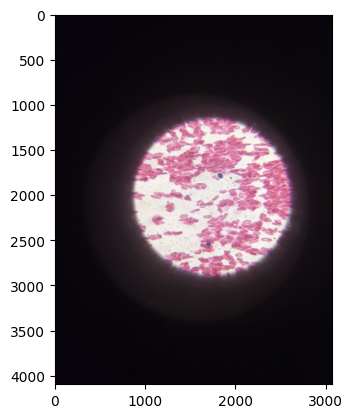

In [5]:
image = ex['image']
plt.imshow(image)

In [6]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['0', '1', '2'], id=None)

In [7]:
labels.int2str(ex['label'])

'1'

Filter:   0%|          | 0/814 [00:00<?, ? examples/s]

Filter:   0%|          | 0/814 [00:00<?, ? examples/s]

Filter:   0%|          | 0/814 [00:00<?, ? examples/s]

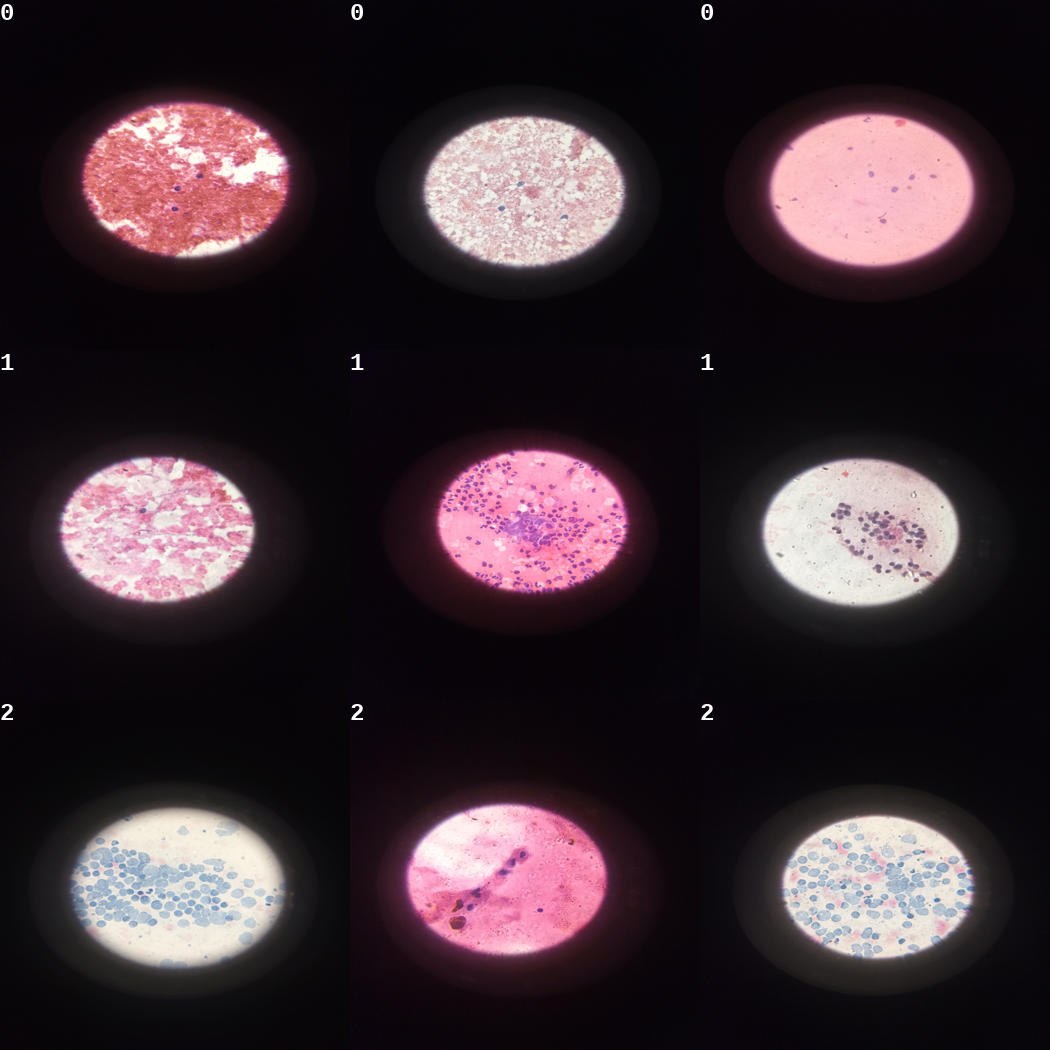

In [8]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)


In [9]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

2024-03-16 14:48:46.940880: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 14:48:46.940914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 14:48:46.941961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 14:48:46.947117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 14:48:47.670926: W tensorflow/comp

In [10]:
processor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.9137, -0.9137, -0.9216,  ..., -0.9294, -0.9294, -0.9373],
          [-0.9137, -0.9059, -0.9137,  ..., -0.9294, -0.9294, -0.9294],
          [-0.9137, -0.9137, -0.9137,  ..., -0.9373, -0.9294, -0.9216],
          ...,
          [-0.9216, -0.9216, -0.9216,  ..., -0.9373, -0.9373, -0.9373],
          [-0.9216, -0.9216, -0.9294,  ..., -0.9373, -0.9373, -0.9373],
          [-0.9137, -0.9216, -0.9294,  ..., -0.9373, -0.9373, -0.9373]],

         [[-0.9608, -0.9608, -0.9608,  ..., -0.9451, -0.9529, -0.9529],
          [-0.9529, -0.9529, -0.9529,  ..., -0.9529, -0.9529, -0.9451],
          [-0.9529, -0.9608, -0.9608,  ..., -0.9529, -0.9529, -0.9451],
          ...,
          [-0.9686, -0.9686, -0.9686,  ..., -0.9529, -0.9529, -0.9529],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9529, -0.9529],
          [-0.9686, -0.9608, -0.9686,  ..., -0.9608, -0.9529, -0.9451]],

         [[-0.8980, -0.9059, -0.9059,  ..., -0.9059, -0.9059, -0.9137],
          [-0

In [11]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

In [12]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.9216, -0.9294, -0.9294,  ..., -0.9216, -0.9373, -0.9451],
          [-0.9216, -0.9294, -0.9216,  ..., -0.9294, -0.9451, -0.9373],
          [-0.9294, -0.9294, -0.9294,  ..., -0.9216, -0.9373, -0.9373],
          ...,
          [-0.9294, -0.9294, -0.9216,  ..., -0.9451, -0.9451, -0.9451],
          [-0.9294, -0.9294, -0.9216,  ..., -0.9451, -0.9451, -0.9373],
          [-0.9294, -0.9216, -0.9216,  ..., -0.9451, -0.9451, -0.9373]],

         [[-0.9686, -0.9686, -0.9686,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9608, -0.9686, -0.9608,  ..., -0.9529, -0.9608, -0.9529],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9529, -0.9608, -0.9608],
          ...,
          [-0.9686, -0.9686, -0.9608,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9608, -0.9686, -0.9608,  ..., -0.9608, -0.9608, -0.9529],
          [-0.9608, -0.9608, -0.9608,  ..., -0.9608, -0.9608, -0.9529]],

         [[-0.9137, -0.9137, -0.9137,  ..., -0.9137, -0.9137, -0.9216],
          [-0

In [13]:
# ds = load_dataset('beans')
# ds = load_dataset("imagefolder", data_dir="data/huggingface")

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['label'] = example_batch['label']
    return inputs


In [14]:
prepared_ds = ds.with_transform(transform)

In [15]:
prepared_ds['train'][0:2];

In [16]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [17]:
import numpy as np
from datasets import load_metric
import evaluate

metric = evaluate.load("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [18]:
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="../model/vit-thyroid-tan",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=10,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


In [22]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=processor,
)


In [23]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


/home/quan/miniconda3/envs/thyroid/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy
100,0.333900,1.278234,0.540470
200,0.016100,2.231557,0.503916


/home/quan/miniconda3/envs/thyroid/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/quan/miniconda3/envs/thyroid/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


***** train metrics *****
  epoch                    =        10.0
  total_flos               = 587469384GF
  train_loss               =      0.2687
  train_runtime            =  0:19:07.77
  train_samples_per_second =       7.092
  train_steps_per_second   =       0.227


In [24]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =     0.5405
  eval_loss               =     1.2782
  eval_runtime            = 0:00:47.96
  eval_samples_per_second =      7.984
  eval_steps_per_second   =        0.5


In [25]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7